In [ ]:
#Q2 - A
import pandas as pd
from ISLP import load_data

OJ = load_data('OJ')

train_data = OJ[OJ['StoreID'].isin([1, 2, 3, 4])]


train_subset = train_data[['LoyalCH', 'SpecialCH', 'PriceDiff']]

summary_stats = train_subset.describe().iloc[:, :4]
print(summary_stats)


          LoyalCH   SpecialCH   PriceDiff
count  714.000000  714.000000  714.000000
mean     0.519988    0.046218    0.114524
std      0.313757    0.210105    0.255935
min      0.000011    0.000000   -0.670000
25%      0.272261    0.000000    0.000000
50%      0.500000    0.000000    0.200000
75%      0.795200    0.000000    0.300000
max      0.999947    1.000000    0.440000


In [ ]:
#Q2 - B

correlation_matrix = train_subset.corr()
print(correlation_matrix)


            LoyalCH  SpecialCH  PriceDiff
LoyalCH    1.000000   0.137058   0.104261
SpecialCH  0.137058   1.000000   0.129713
PriceDiff  0.104261   0.129713   1.000000


In [ ]:
#Q2 - C
import statsmodels.api as sm


X = train_subset[['LoyalCH', 'SpecialCH', 'PriceDiff']]
X = sm.add_constant(X)  
y = (train_data['Purchase'] == 'CH').astype(int)  

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.414155
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Purchase   No. Observations:                  714
Model:                          Logit   Df Residuals:                      710
Method:                           MLE   Df Model:                            3
Date:                Wed, 22 Oct 2025   Pseudo R-squ.:                  0.4009
Time:                        17:12:59   Log-Likelihood:                -295.71
converged:                       True   LL-Null:                       -493.55
Covariance Type:            nonrobust   LLR p-value:                 1.902e-85
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4069      0.267    -12.756      0.000      -3.930      -2.883
LoyalCH        6.3847      0.

In [ ]:
#Q2 - D
from sklearn.metrics import confusion_matrix, accuracy_score

pred_probs = result.predict(X)


predictions = (pred_probs > 0.5).astype(int)

cm = confusion_matrix(y, predictions)
accuracy = accuracy_score(y, predictions)

false_positives = cm[0, 1]
false_negatives = cm[1, 0]

print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy: {accuracy:.4f}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")


Confusion Matrix:
[[316 101]
 [ 81 572]]
Accuracy: 0.8299
False Positives: 101
False Negatives: 81


In [ ]:
#Q2 - E

X_significant = train_subset[['LoyalCH']] 
X_significant = sm.add_constant(X_significant)

model_significant = sm.Logit(y, X_significant)
result_significant = model_significant.fit()

pred_probs_significant = result_significant.predict(X_significant)

predictions_significant = (pred_probs_significant > 0.5).astype(int)

cm_significant = confusion_matrix(y, predictions_significant)
accuracy_significant = accuracy_score(y, predictions_significant)

false_positives_significant = cm_significant[0, 1]
false_negatives_significant = cm_significant[1, 0]

print(f"Confusion Matrix:\n{cm_significant}")
print(f"Accuracy: {accuracy_significant:.4f}")
print(f"False Positives: {false_positives_significant}")
print(f"False Negatives: {false_negatives_significant}")


Optimization terminated successfully.
         Current function value: 0.443142
         Iterations 6
Confusion Matrix:
[[252  83]
 [ 63 316]]
Accuracy: 0.7955
False Positives: 83
False Negatives: 63


In [ ]:
#Q2 - F
from sklearn.naive_bayes import GaussianNB

X_nb = train_subset[['LoyalCH']]
X_nb = sm.add_constant(X_nb)
X_nb = X_nb.values 
y_nb = (train_data['Purchase'] == 'CH').astype(int)

nb_model = GaussianNB()
nb_model.fit(X_nb, y_nb)

pred_probs_nb = nb_model.predict_proba(X_nb)[:, 1]

predictions_nb = (pred_probs_nb > 0.5).astype(int)

cm_nb = confusion_matrix(y_nb, predictions_nb)
accuracy_nb = accuracy_score(y_nb, predictions_nb)

false_positives_nb = cm_nb[0, 1]
false_negatives_nb = cm_nb[1, 0]

print(f"Confusion Matrix:\n{cm_nb}")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"False Positives: {false_positives_nb}")
print(f"False Negatives: {false_negatives_nb}")


Confusion Matrix:
[[251  84]
 [ 63 316]]
Accuracy: 0.7941
False Positives: 84
False Negatives: 63


In [ ]:
#Q2 - G
from sklearn.neighbors import KNeighborsClassifier

X_knn = train_subset[['LoyalCH']]
X_knn = sm.add_constant(X_knn)
X_knn = X_knn.values  
y_knn = (train_data['Purchase'] == 'CH').astype(int)

k_values = [5, 50, 150]
accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_knn, y_knn)

    pred_probs_knn = knn_model.predict_proba(X_knn)[:, 1]

    predictions_knn = (pred_probs_knn > 0.5).astype(int)

    cm_knn = confusion_matrix(y_knn, predictions_knn)
    accuracy_knn = accuracy_score(y_knn, predictions_knn)
    accuracies.append(accuracy_knn)

    false_positives_knn = cm_knn[0, 1]
    false_negatives_knn = cm_knn[1, 0]

    print(f"k = {k}")
    print(f"Confusion Matrix:\n{cm_knn}")
    print(f"Accuracy: {accuracy_knn:.4f}")
    print(f"False Positives: {false_positives_knn}")
    print(f"False Negatives: {false_negatives_knn}")
    print("-" * 30)

best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best k: {best_k}")


k = 5
Confusion Matrix:
[[252  83]
 [ 54 325]]
Accuracy: 0.8081
False Positives: 83
False Negatives: 54
------------------------------
k = 50
Confusion Matrix:
[[252  83]
 [ 62 317]]
Accuracy: 0.7969
False Positives: 83
False Negatives: 62
------------------------------
k = 150
Confusion Matrix:
[[274  61]
 [ 84 295]]
Accuracy: 0.7969
False Positives: 61
False Negatives: 84
------------------------------
Best k: 5


NameError: name 'y_significant' is not defined

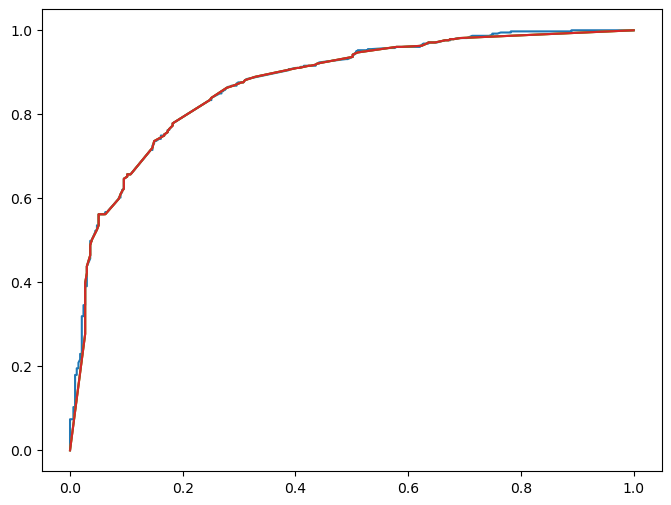

In [ ]:
#Q2 - H
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

fpr, tpr, _ = roc_curve(y_nb, pred_probs_nb)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {roc_auc:.2f})')

for k in k_values:
    fpr, tpr, _ = roc_curve(y_knn, pred_probs_knn)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'k-NN k={k} (AUC = {roc_auc:.2f})')


y_significant = (train_data['Purchase'] == 'CH').astype(int)


fpr, tpr, _ = roc_curve(y_significant, pred_probs_significant)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Logistic (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


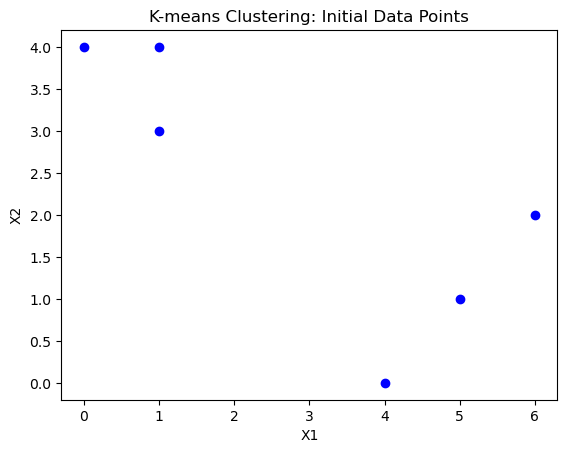

In [ ]:
#Q3 - A
import matplotlib.pyplot as plt

X1 = [1, 1, 0, 5, 6, 4]
X2 = [4, 3, 4, 1, 2, 0]

plt.scatter(X1, X2, color='blue')  
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-means Clustering: Initial Data Points')
plt.show()


In [ ]:
#Q3 - B
import numpy as np

cluster_labels = np.random.choice([0, 1], size=6)
print("Cluster Labels:", cluster_labels)



Cluster Labels: [0 1 1 0 1 1]


In [ ]:
#Q3 - C

cluster_0 = [(X1[i], X2[i]) for i in range(6) if cluster_labels[i] == 0]
cluster_1 = [(X1[i], X2[i]) for i in range(6) if cluster_labels[i] == 1]

centroid_0 = np.mean(cluster_0, axis=0)
centroid_1 = np.mean(cluster_1, axis=0)

print("Centroid of Cluster 0:", centroid_0)
print("Centroid of Cluster 1:", centroid_1)


Centroid of Cluster 0: [3.  2.5]
Centroid of Cluster 1: [2.75 2.25]


In [ ]:
#Q3 - D
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

new_cluster_labels = []
for i in range(6):
    distance_to_0 = euclidean_distance((X1[i], X2[i]), centroid_0)
    distance_to_1 = euclidean_distance((X1[i], X2[i]), centroid_1)
    new_cluster_labels.append(0 if distance_to_0 < distance_to_1 else 1)

print("New Cluster Labels:", new_cluster_labels)


New Cluster Labels: [1, 1, 1, 0, 0, 1]


In [ ]:
#Q3 - E
old_cluster_labels = None
while old_cluster_labels != new_cluster_labels:
    old_cluster_labels = new_cluster_labels.copy()
    
    cluster_0 = [(X1[i], X2[i]) for i in range(6) if new_cluster_labels[i] == 0]
    cluster_1 = [(X1[i], X2[i]) for i in range(6) if new_cluster_labels[i] == 1]
    centroid_0 = np.mean(cluster_0, axis=0)
    centroid_1 = np.mean(cluster_1, axis=0)
    
    new_cluster_labels = []
    for i in range(6):
        distance_to_0 = euclidean_distance((X1[i], X2[i]), centroid_0)
        distance_to_1 = euclidean_distance((X1[i], X2[i]), centroid_1)
        new_cluster_labels.append(0 if distance_to_0 < distance_to_1 else 1)

print("Final Cluster Labels:", new_cluster_labels)
print("Centroid of Cluster 0:", centroid_0)
print("Centroid of Cluster 1:", centroid_1)


Final Cluster Labels: [1, 1, 1, 0, 0, 0]
Centroid of Cluster 0: [5. 1.]
Centroid of Cluster 1: [0.66666667 3.66666667]


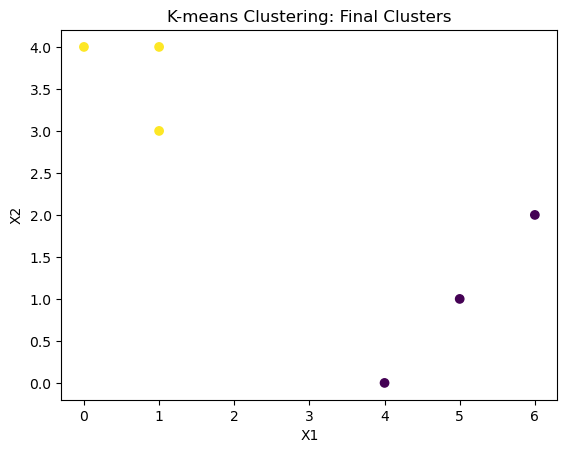

In [ ]:
#Q3 - F
plt.scatter(X1, X2, c=new_cluster_labels, cmap='viridis') 
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-means Clustering: Final Clusters')
plt.show()


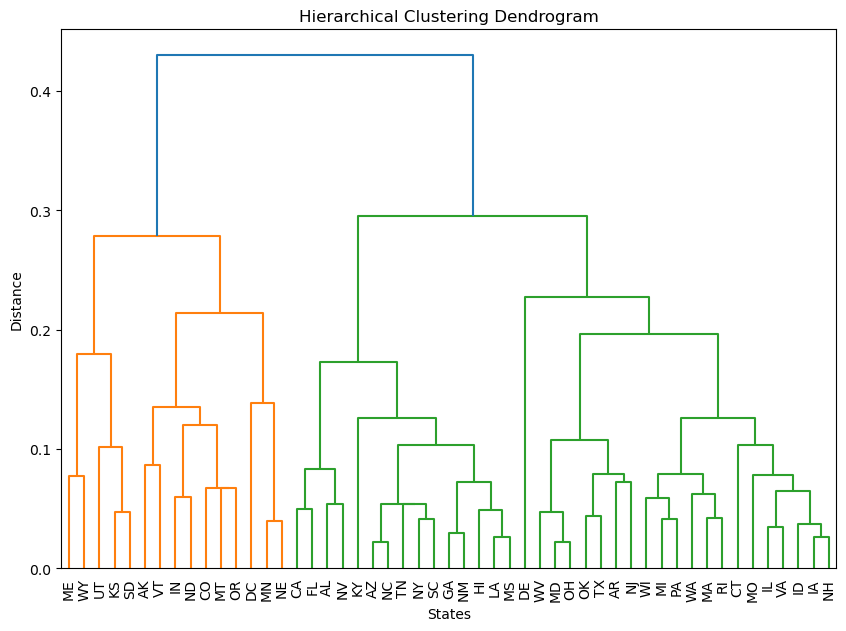

In [ ]:
#Q4 - A
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster

file_path = '/Users/jiyabhadreshbhaigorasiya/Documents/cse2600/Data/CEV2021.csv'
data = pd.read_csv(file_path)

features = ['Formal_Volunteering', 'Organizational_Membership', 'Charitable_Giving', 'Voting_Local', 'Attending_Public_Meetings']
data_for_clustering = data[features]

Z = sch.linkage(data_for_clustering, method='complete', metric='euclidean')

plt.figure(figsize=(10, 7))
sch.dendrogram(Z, labels=data['State'].values, orientation='top', leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('States')
plt.ylabel('Distance')
plt.show()




In [65]:
#Q4 - B
clusters_3 = fcluster(Z, t=0.3, criterion='distance')
data['Cluster_3'] = clusters_3
cluster_3_states = data[['State', 'Cluster_3']].sort_values(by='Cluster_3')
print("Clusters for 3 distinct clusters:\n", cluster_3_states)


Clusters for 3 distinct clusters:
    State  Cluster_3
50    WY          1
26    MT          1
23    MN          1
34    ND          1
19    ME          1
37    OR          1
16    KS          1
27    NE          1
41    SD          1
14    IN          1
8     DC          1
1     AK          1
44    UT          1
45    VT          1
5     CO          1
42    TN          2
31    NM          2
32    NY          2
48    WV          2
33    NC          2
47    WA          2
46    VA          2
43    TX          2
36    OK          2
38    PA          2
39    RI          2
40    SC          2
35    OH          2
30    NJ          2
0     AL          2
28    NV          2
2     AZ          2
3     AR          2
4     CA          2
6     CT          2
7     DE          2
9     FL          2
10    GA          2
11    HI          2
29    NH          2
12    ID          2
15    IA          2
17    KY          2
18    LA          2
20    MD          2
21    MA          2
22    MI          2
24   

In [66]:
#Q4 - C
clusters_4 = fcluster(Z, t=0.4, criterion='distance')
data['Cluster_4'] = clusters_4
cluster_4_states = data[['State', 'Cluster_4']].sort_values(by='Cluster_4')
print("Clusters for 4 distinct clusters:\n", cluster_4_states)

Clusters for 4 distinct clusters:
    State  Cluster_4
50    WY          1
26    MT          1
23    MN          1
34    ND          1
19    ME          1
37    OR          1
16    KS          1
27    NE          1
41    SD          1
14    IN          1
8     DC          1
1     AK          1
44    UT          1
45    VT          1
5     CO          1
42    TN          2
31    NM          2
32    NY          2
48    WV          2
33    NC          2
47    WA          2
46    VA          2
43    TX          2
36    OK          2
38    PA          2
39    RI          2
40    SC          2
35    OH          2
30    NJ          2
0     AL          2
28    NV          2
2     AZ          2
3     AR          2
4     CA          2
6     CT          2
7     DE          2
9     FL          2
10    GA          2
11    HI          2
29    NH          2
12    ID          2
15    IA          2
17    KY          2
18    LA          2
20    MD          2
21    MA          2
22    MI          2
24   

In [67]:
#Q4 - D 
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data[features])
kmeans_clustered_states = data[['State', 'KMeans_Cluster']].sort_values(by='KMeans_Cluster')
print("K-means Clustering (K=3):\n", kmeans_clustered_states)

K-means Clustering (K=3):
    State  KMeans_Cluster
25    MO               0
49    WI               0
22    MI               0
21    MA               0
38    PA               0
16    KS               0
15    IA               0
14    IN               0
12    ID               0
39    RI               0
13    IL               0
41    SD               0
47    WA               0
46    VA               0
44    UT               0
29    NH               0
7     DE               0
6     CT               0
43    TX               1
36    OK               1
40    SC               1
33    NC               1
30    NJ               1
42    TN               1
32    NY               1
31    NM               1
48    WV               1
35    OH               1
0     AL               1
11    HI               1
24    MS               1
2     AZ               1
20    MD               1
3     AR               1
18    LA               1
4     CA               1
17    KY               1
28    NV               

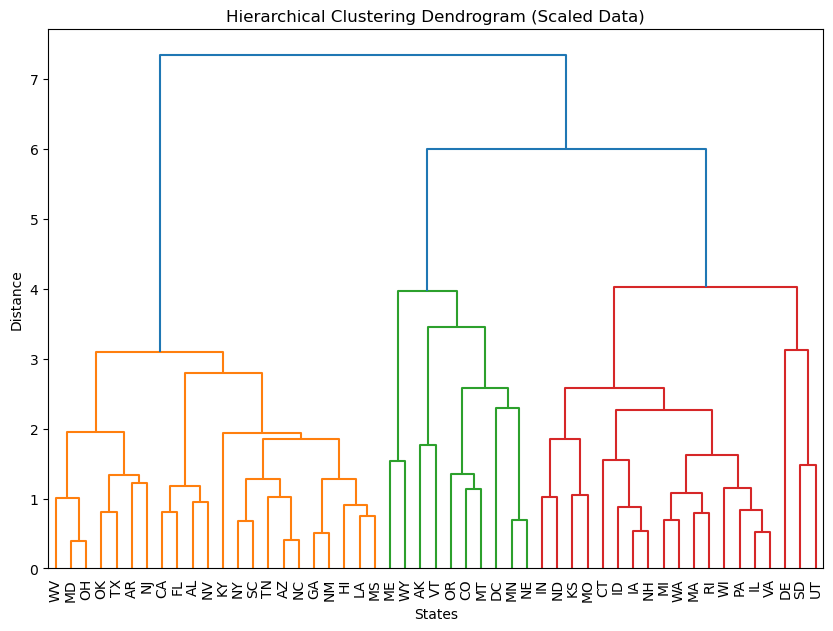

In [68]:
#Q4 - E
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Perform hierarchical clustering on the scaled data
Z_scaled = sch.linkage(scaled_data, method='complete', metric='euclidean')

# Plotting the dendrogram for scaled data
plt.figure(figsize=(10, 7))
sch.dendrogram(Z_scaled, labels=data['State'].values, orientation='top', leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Scaled Data)')
plt.xlabel('States')
plt.ylabel('Distance')
plt.show()

In [69]:
#Q4 - F 
clusters_scaled_3 = fcluster(Z_scaled, t=3, criterion='distance')
data['Cluster_Scaled_3'] = clusters_scaled_3
scaled_cluster_3_states = data[['State', 'Cluster_Scaled_3']].sort_values(by='Cluster_Scaled_3')
print("Clusters for 3 distinct clusters (Scaled Data):\n", scaled_cluster_3_states)


Clusters for 3 distinct clusters (Scaled Data):
    State  Cluster_Scaled_3
48    WV                 1
3     AR                 1
43    TX                 1
30    NJ                 1
36    OK                 1
20    MD                 1
35    OH                 1
0     AL                 2
28    NV                 2
18    LA                 2
17    KY                 2
31    NM                 2
32    NY                 2
10    GA                 2
11    HI                 2
9     FL                 2
40    SC                 2
42    TN                 2
4     CA                 2
2     AZ                 2
33    NC                 2
24    MS                 2
50    WY                 3
19    ME                 3
1     AK                 4
45    VT                 4
23    MN                 5
5     CO                 5
37    OR                 5
8     DC                 5
26    MT                 5
27    NE                 5
16    KS                 6
21    MA                 6
47    

In [70]:
#Q4 - G
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
data['KMeans_Scaled_Cluster'] = kmeans_scaled.fit_predict(scaled_data)
kmeans_scaled_clustered_states = data[['State', 'KMeans_Scaled_Cluster']].sort_values(by='KMeans_Scaled_Cluster')
print("K-means Clustering (K=3 on Scaled Data):\n", kmeans_scaled_clustered_states)


K-means Clustering (K=3 on Scaled Data):
    State  KMeans_Scaled_Cluster
50    WY                      0
19    ME                      0
8     DC                      0
45    VT                      0
43    TX                      1
42    TN                      1
40    SC                      1
36    OK                      1
35    OH                      1
48    WV                      1
33    NC                      1
32    NY                      1
31    NM                      1
30    NJ                      1
28    NV                      1
24    MS                      1
20    MD                      1
18    LA                      1
0     AL                      1
9     FL                      1
10    GA                      1
11    HI                      1
2     AZ                      1
3     AR                      1
4     CA                      1
17    KY                      1
16    KS                      2
38    PA                      2
39    RI                      

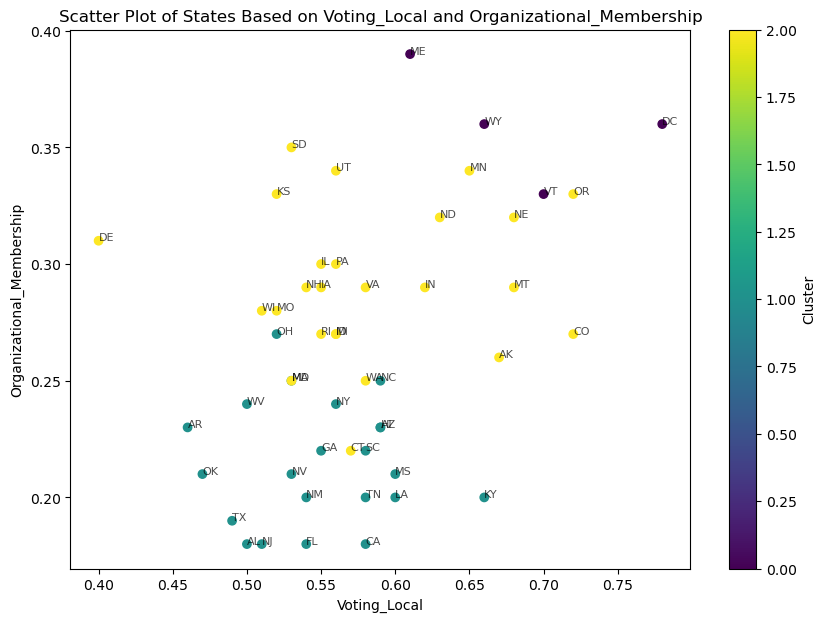

In [71]:
#Q4 - H 
plt.figure(figsize=(10, 7))
plt.scatter(data['Voting_Local'], data['Organizational_Membership'], c=data['KMeans_Scaled_Cluster'], cmap='viridis')

# Adding labels and title
plt.title('Scatter Plot of States Based on Voting_Local and Organizational_Membership')
plt.xlabel('Voting_Local')
plt.ylabel('Organizational_Membership')

# Annotating each point with the state
for i, state in enumerate(data['State']):
    plt.annotate(state, (data['Voting_Local'][i], data['Organizational_Membership'][i]), fontsize=8, alpha=0.7)

plt.colorbar(label='Cluster')
plt.show()